**[Workshop description]**

Matplotlib

* base
    * plot types...
* customizing plots
    * titles
    * axis labels
    * tick labels
* Seaborn

In [1]:
%matplotlib inline

#from __future__ import division, print_function

import math
import random

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

**CREATE SOME NEW VARIABLES** E.g., year-bin.

Let's start by looking at Gapminder data, which is tab-delimited, compiled by Jennifer Bryan. For more information, checkout her [gapminder](https://github.com/jennybc/gapminder) repository.

In [2]:
gm = pd.read_csv('data/gapminder.tsv', sep='\t')

In [3]:
gm.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


Let's also create a variable called `decade` since it might be interesting to create some plots at that level.

In [4]:
gm['decade'] = gm['year'].apply(lambda x: int(x / 10) * 10)

Let's say we're interested in Portugal's GDP per capita over time. First, create a `DataFrame` for the country.

In [5]:
portugal = gm[gm['country'] == 'Portugal']

Next, call the `plot()` function, which is the default line graph. The first argument corresponds to the $x$-axis and the second to the $y$-axis. Note that $x$ and $y$ must have the same dimensions&mdash;that is, be of the same length.

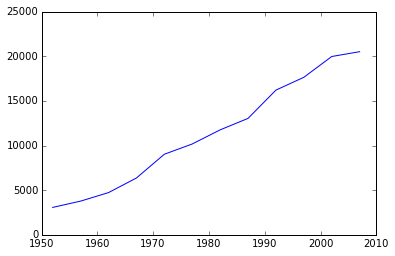

In [6]:
plt.plot(portugal.year, portugal.gdpPercap)

Per capita GDP has been increasing over time in Portugal. Cool!

(What you see above are `Matplotlib` defaults. For now, we'll continue with those as the first portion of this workshop is geared toward getting yourself familiar with the API&mdash;how to actually create the plots you're interested in. Then, we'll cover how to customize plot styles.)

Back to the plot. For data that has a time component, as the *yearly* GDP per capita does, a line is often an appropiate choice.

Next, it might be interesting to get a sense of how many countries per continent we have data for. Let's create a country `DataFrame` that includes unique combinations of country and continent.

In [7]:
countries = gm[['country', 'continent']]
countries = countries.drop_duplicates()

To get the counts, we can use the `.groupby()` method and create a `DataFrame` called "country_counts."

In [8]:
country_counts = pd.DataFrame({'n_countries' : countries.groupby('continent')['country'].count()}).reset_index()

In [9]:
country_counts

,continent,n_countries
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


For this data, because we're looking at distinct categories, let's create a bar plot.

By default, `Matplotlib` left-aligns bars. Let's fix that by using the `align` parameter. Let's also label the x-ticks so we know the continents the bars correspond to. While we're add it, we'll also add a title.

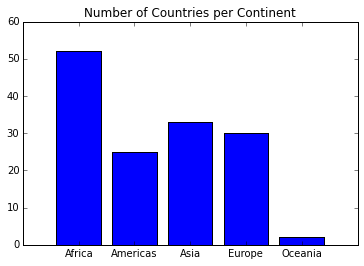

In [10]:
plt.bar(range(len(country_counts)), country_counts.n_countries, align='center')

plt.title('Number of Countries per Continent')
plt.xticks(country_counts['continent'].index, country_counts['continent']);

**Protip**: Use a semicolon (`;`) at the end of a line to suppress unwanted output.

That was a lot. Let's describe what's happening. For the title, simply add the text you'd like. The `.xticks()` method, for setting the x-axis tick labels, takes two arguments. The first is the *position* for the label and the second is the label itself. The arguments are container-like objects, such as lists or `NumPy` arrays. The lengths of the arguments *do not* have to be of the same length. However, this will cause certain labels you probably want or need to not be drawn onto the figure.

As you can see, we can call the `plt` multiple times and it will work on and modify the current figure. Most of the time, the order doesn't matter.

Next, let's start exploring the relationship between variables. An interesting one might be the relationship between per capita GDP and life expectancy. It's normally a good idea to transform GDP values. This is typically done by taking the log of the values.

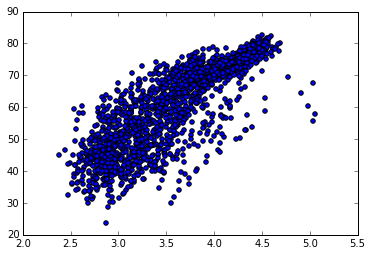

In [11]:
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'])

Like with `plt.plot()`, the first argument corresponds to the x-axis and the second to the y-axis.

This plot doesn't look _too_ great, though, especially since there are so many points and they overlap. We can do several things. Let's change the shape with the `marker` parameter, the fill color with the `facecolor` parameter, the opacity with the `alpha` parameter, and the border color of each marker with the `edgecolor` parameter.

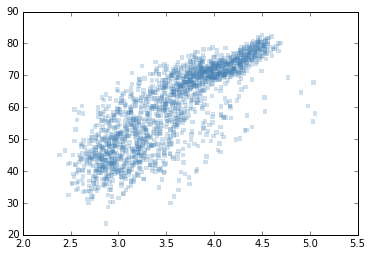

In [12]:
plt.scatter(np.log10(gm['gdpPercap']),
            gm['lifeExp'],
            marker='s',
            facecolor='SteelBlue',
            alpha=0.25,
            edgecolor='None')

There is a list of the possible values that `marker` can take. You can find more information on those [here](http://matplotlib.org/api/markers_api.html#markers). The `facecolor` parameter can take:

* single letters representing built-in colors (e.g., `b` for blue)
* html hex strings
* html color names
* RGB tuples (with each element between 0 and 1
* string encoded floating point values between 0 and 1 (for gray shades)

This is the same for `edgecolor`. For *no* color, use `'None'`. For more information on colors in `Matplotlib` see [here](http://matplotlib.org/api/colors_api.html#colors).

Finally, the `alpha` parameter specifies the opacity of *both* the marker face and edge colors. It can take values between 0 and 1, where a value of zero will make the color completely transparent and a value of one will make it solid.

Perhaps we like the the plot above, but are interested in average by continent and decade. For this, we'll first use `pandas`'s `.groupby()` method to create a new `DataFrame`. Then, we'll loop through each of the decades and plot the corresponding values. We also need to decide what colors to use for each decade. Before we do that, let's figure out how many decades we're dealing with.

In [13]:
gm.decade.unique()

array([1950, 1960, 1970, 1980, 1990, 2000])

Great! We have six decades worth of data, which means we'll need six colors. A great place to find information on color palettes is [ColorBrewer](http://colorbrewer2.org/). Matt Davis has created a great Python package called [Palettable](https://jiffyclub.github.io/palettable/) that gives you access to the ColorBrewer, Cubehelix, Tableau, and Wes Anderson palettes.

For our purposes, I'll use a sequential palette from ColorBrewer. What makes this approach tedius, and the reason I recomment Palettable, is that you have to copy the hex codes one at a time.

In [14]:
hexsix = ['#ffffcc', '#d9f0a3', '#addd8e', '#78c679', '#31a354', '#006837']

Next, we create the DataFrame.

In [15]:
gm_cd = gm.groupby(['continent', 'decade'], as_index=False)['gdpPercap', 'lifeExp'].mean()

Let's plot our values using a loop.

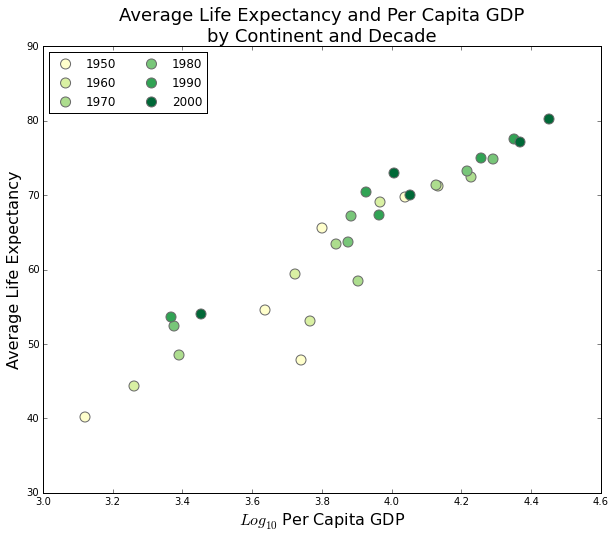

In [16]:
plt.figure(figsize=(10, 8))

for i, decade in enumerate(np.sort(gm_cd.decade.unique())):
    tdf = gm_cd[gm_cd['decade'] == decade]
    plt.scatter(np.log10(tdf['gdpPercap']),
                tdf['lifeExp'],
                s=100,
                facecolor=hexsix[i],
                alpha=1,
                edgecolor='DimGray',
                label=decade)

plt.title('Average Life Expectancy and Per Capita GDP\nby Continent and Decade', fontsize=18)
plt.ylabel('Average Life Expectancy', fontsize=16)
plt.xlabel('$Log_{10}$ Per Capita GDP', fontsize=16)
plt.legend(loc='upper left', ncol=2, scatterpoints=1)

We've introduced several new options with this plot.

First, we're able to control the figure size with `plt.figure(figsize=)`. `figsize` takes a tuple of width and height, in inches. (Note that figure sizes change with changes to DPI.)

For the plot itself, `s` specifies the marker size and `label` if for the label we'll associate with that data for the legend.

We've seen the title before, but we're now specifying what the font size should be, in points. The `ylabel` and `xlabel` functions set the respective axis labels. You'll notice that they even accept LaTeX.

`plt.legend()` is also new. Here, we specify its positioning, layout, and number of markers (the default is three).

In [14]:
africa_asia = gm[(gm['continent'].isin(['Africa', 'Asia'])) &(gm['year'].isin([1952, 2007]))]

In [15]:
africa_asia['color'] = africa_asia['continent'].apply(lambda x: '#348ABD' if x == 'Africa' else '#E24A33')

/Users/JS/.virtualenvs/datascience/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


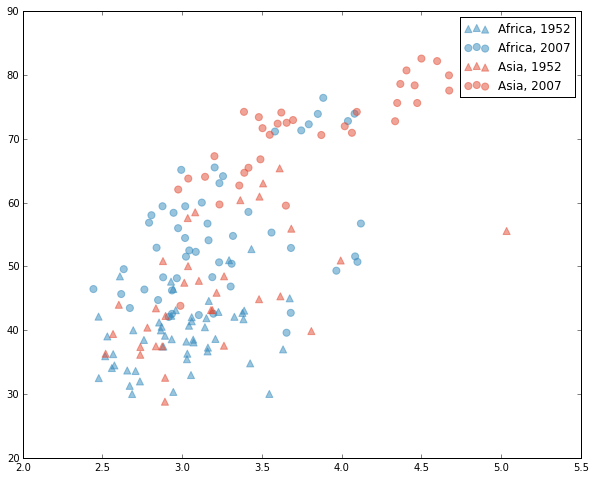

In [16]:
plt.figure(figsize=(10, 8))

for ct in np.sort(africa_asia.continent.unique()):
    for yr in np.sort(africa_asia.year.unique()):
        tdf = africa_asia[(africa_asia['year'] == yr) & (africa_asia['continent'] == ct)]
        if yr == 1952:
            plt.scatter(np.log10(tdf['gdpPercap']), tdf['lifeExp'], color=tdf['color'], s=50, marker='^', alpha=0.5, label=str(ct)+', '+str(yr))
        else:
            plt.scatter(np.log10(tdf['gdpPercap']), tdf['lifeExp'], color=tdf['color'], s=50, marker='o', alpha=0.5, label=str(ct)+', '+str(yr))
            
plt.legend()

While we have this data fresh in our minds, it might make sense to look at the *average* GDP per capita in each continent on a given year (assuming that's even a valid operation to take). First, let's determine what years we can choose from.

In [17]:
gm.year.min(), gm.year.max()

(1952, 2007)

Let's go ahead and pick 1982.

In [18]:
gm1982 = gm[gm['year'] == 1982]

We'll want to look at continent-level data. For this, let's put the data into a list-like container.

In [19]:
continent_gdp = []

for c in np.sort(gm1982.continent.unique()):
    continent_gdp.append(gm1982[gm1982['continent'] == c]['gdpPercap'].values)

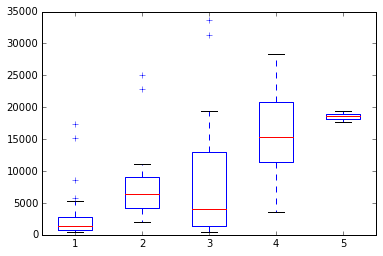

In [20]:
plt.boxplot(continent_gdp);

**boxplot details**: e.g., 1.5 * IQR.

This is a good plot for us to start customizing. As you can see, the boxplot in the fifth position from the left has a small range ans is, thus, difficult to see. Let's begin by increasing the size of the figure.

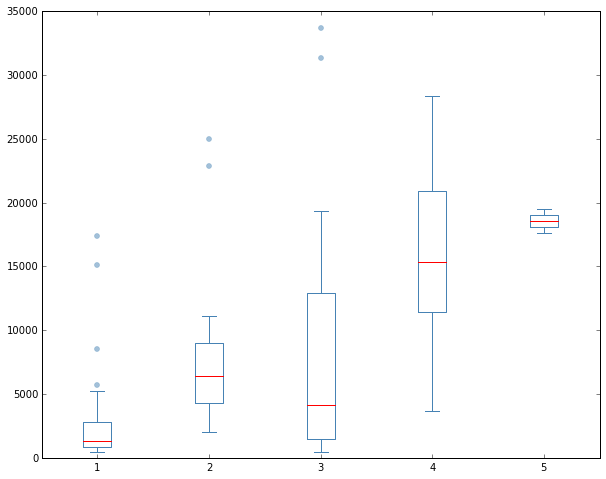

In [21]:
plt.figure(figsize=(10, 8))

color = 'SteelBlue'
flierprops = dict(marker='o', markersize=5, markerfacecolor='SteelBlue',
                  markeredgecolor=color, alpha=0.50, linestyle='none')
capprops = dict(color=color)
whiskerprops = dict(color=color, linestyle='-')
boxprops = dict(color=color)

plt.boxplot(continent_gdp, widths=0.25,
            flierprops=flierprops,
            capprops=capprops,
            whiskerprops=whiskerprops,
            boxprops=boxprops);

We said above that the code order doesn't usually matter. For setting figure options, such as `figsize`, it does.

You may be thinking that customizing plots is verbose.

In [22]:
import seaborn as sns
sns.set(rc={'axes.facecolor' : '#EEEEEE'})

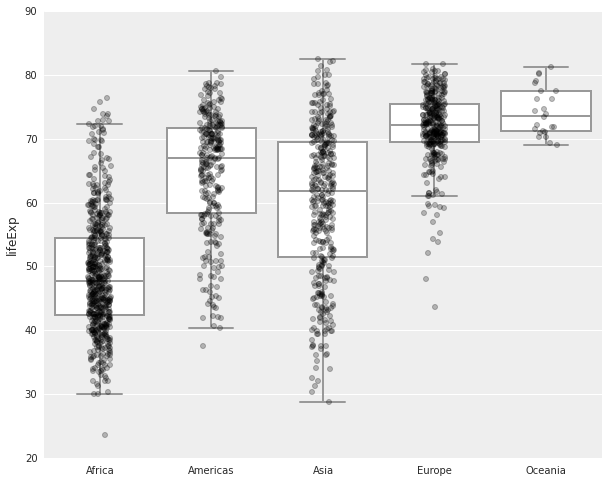

In [54]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="continent", y="lifeExp", data=gm, order=np.sort(gm.continent.unique()), color='white', fliersize=0)
sns.stripplot(x="continent", y="lifeExp", data=gm, order=np.sort(gm.continent.unique()), alpha=0.25, size=5, jitter=True, color='Black', edgecolor='Black')

plt.xlabel('')

It's important to note that a side effect of importing `Seaborn` is that it changes *all* plot styles. For example, if you wanted to create a line plot using....

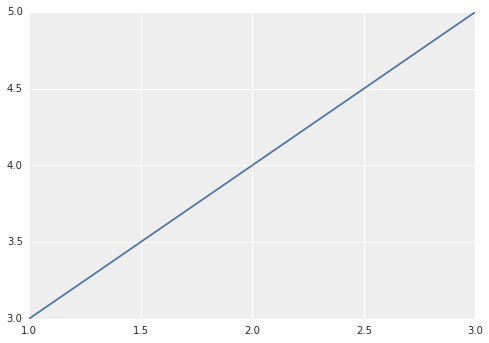

In [24]:
plt.plot([1, 2, 3], [3, 4, 5])

In [25]:
gm1982.groupby('continent')['gdpPercap'].mean()

continent
Africa       2481.592960
Americas     7506.737088
Asia         7434.135157
Europe      15617.896551
Oceania     18554.709840
Name: gdpPercap, dtype: float64

In [26]:
gm1982.groupby('continent')['gdpPercap'].var()

continent
Africa      10514667.169140
Americas    30586324.851497
Asia        75710472.469740
Europe      41644239.727432
Oceania      1701272.514048
Name: gdpPercap, dtype: float64

How about we make this look slightly better. We'll use Cameron Davidson-Pilon's [Bayesian Methods for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers) style.

In [27]:
plt.style.use('bmh')

In [28]:
print(plt.style.available)

['dark_background', 'bmh', 'fivethirtyeight', 'grayscale', 'ggplot']


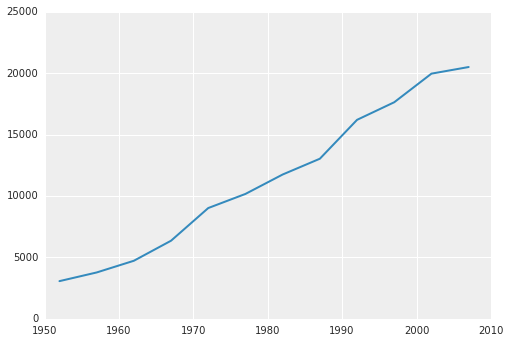

In [29]:
plt.plot(portugal.year, portugal.gdpPercap)

In [30]:
continent_gdp = gm.groupby(['continent', 'year'], as_index=False)['gdpPercap'].mean()

In [31]:
countries = np.sort(continent_gdp.continent.unique())

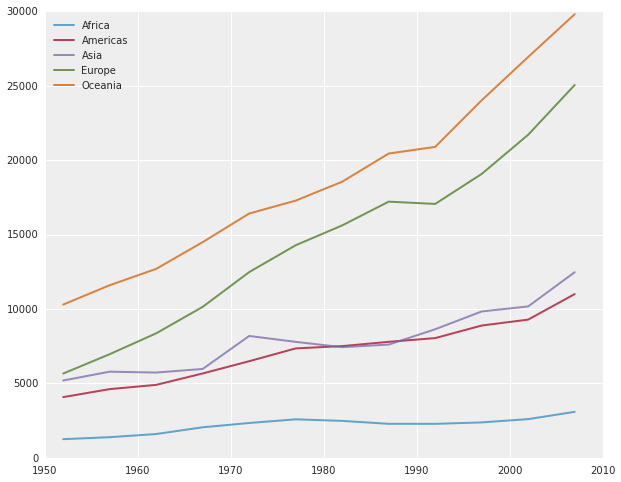

In [32]:
plt.figure(figsize=(10, 8))

for c in countries:
    tdf = continent_gdp[continent_gdp['continent'] == c]
    plt.plot(tdf['year'], tdf['gdpPercap'], alpha=0.75, label=c)
    
plt.legend(loc='upper left')

Remember that these are continent-level averages with lots of variation between countries.

In [33]:
x = np.random.rand(100)
y = np.random.randint(0, 1000, 100)

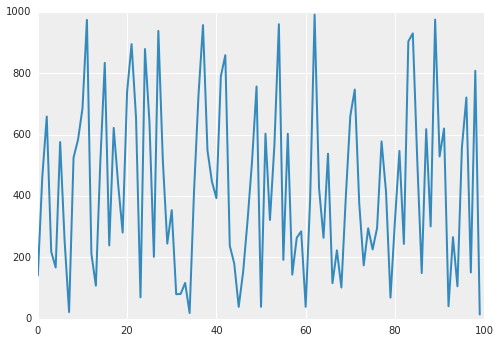

In [34]:
plt.plot(range(len(y)), y)

(-10, 1010)

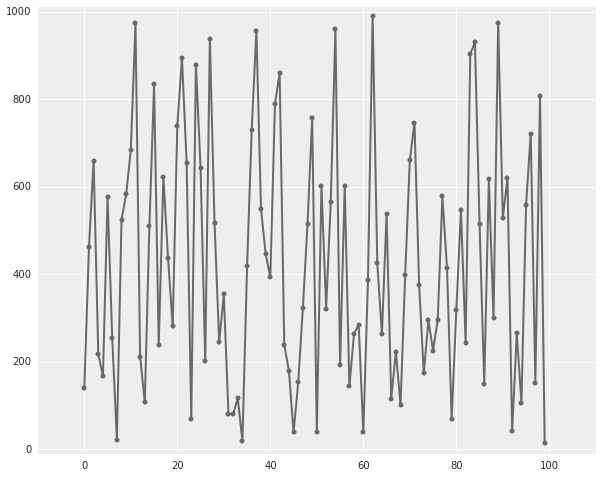

In [35]:
plt.figure(figsize=(10, 8))

plt.plot(range(len(y)), y, color='DimGray', marker='o', markersize=5, markeredgecolor='None')
plt.xlim(-10, 110)
plt.ylim(-10, 1010)

(-10, 110)

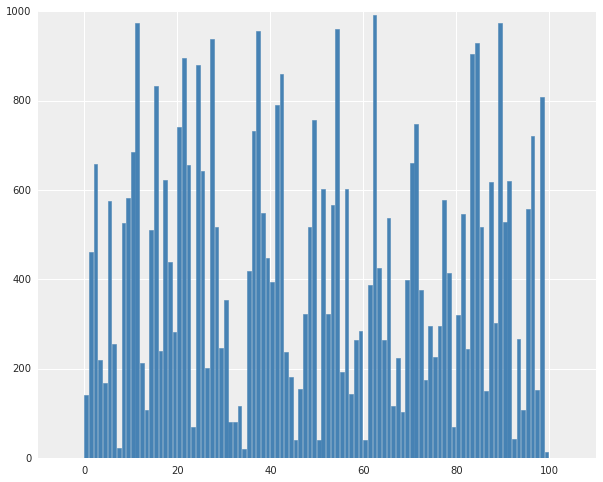

In [36]:
plt.figure(figsize=(10, 8))
plt.bar(range(len(y)), y, color='SteelBlue', edgecolor='SteelBlue')

plt.xlim(-10, 110)

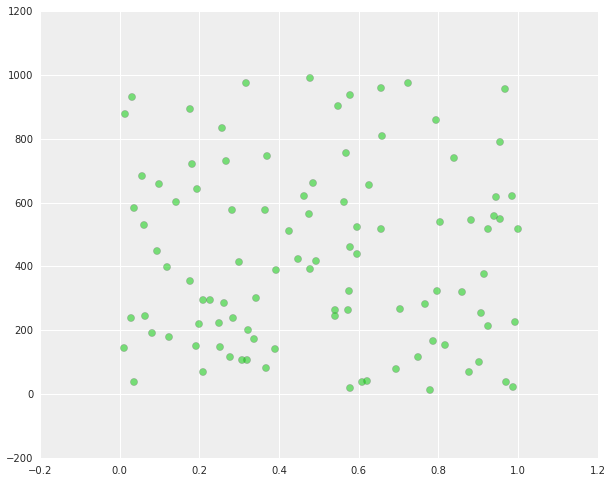

In [37]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color='#00CC00', s=50, alpha=0.5, edgecolor='DimGray')